### Import statements

In [1]:
from netCDF4 import Dataset
import wrf
from wrf import getvar, ALL_TIMES, latlon_coords, CoordPair, vertcross, to_np, interpline
import xarray as xr
import numpy as np
import cartopy.crs as crs
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import for colormap
import matplotlib as mpl
import pandas as pd
import metpy
import metpy.calc as mpcalc

### Importing all storm data

In [2]:
# Function to import files

def dataset_files(setup, run_no, year, file = True):
    year_dict = {
        2017: ['16_00', '15_23', '15_22', '15_21', '15_20', '2017-02'],
        2018: ['18_00', '17_23', '17_22', '17_21', '17_20', '2018-12'],
        2020: ['15_00', '14_23', '14_22', '14_21', '14_20', '2020-12'],
        2024: ['11_00', '10_23', '10_22', '10_21', '10_20', '2024-02'],
    }
    if file:
        t = year_dict[year][run_no-1]
        t_ind = int(t[0:2])
        t2 = str(t_ind+1)+t[2:]
        t3 = str(t_ind+2)+t[2:]
        if run_no == 1:
            dat = [Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t2}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t2}:10:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t3}:10:00')]
        else:
            hour = t[3:5]
            dat = [Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t2}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t2}:10:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t3}:10:00')]
        return(dat)
    else:
        if run_no == 1:
            dat = Dataset(f'/g/data/li18/em3807_2/WRF_runs/extracted_data/{setup}_{year}_subset.nc')
        else:
            dat = Dataset(f'/g/data/li18/em3807_2/WRF_runs/extracted_data/{setup}_{year}_{run_no}_subset.nc')
        return(dat)

# 2017

data_17_crop = dataset_files('Cropland', 1, 2017)
data_17_crop_2 = dataset_files('Cropland', 2, 2017)
data_17_crop_3 = dataset_files('Cropland', 3, 2017)
data_17_crop_4 = dataset_files('Cropland', 4, 2017)
data_17_crop_5 = dataset_files('Cropland', 5, 2017)

data_17_noeuro = dataset_files('Pre_Euro', 1, 2017, file = False)
data_17_noeuro_2 = dataset_files('Pre_Euro', 2, 2017, file = False)
data_17_noeuro_3 = dataset_files('Pre_Euro', 3, 2017, file = False)
data_17_noeuro_4 = dataset_files('Pre_Euro', 4, 2017, file = False)
data_17_noeuro_5 = dataset_files('Pre_Euro', 5, 2017, file = False)

data_17_nat = dataset_files('Natland', 1, 2017, file = False)
data_17_nat_2 = dataset_files('Natland', 2, 2017, file = False)
data_17_nat_3 = dataset_files('Natland', 3, 2017, file = False)
data_17_nat_4 = dataset_files('Natland', 4, 2017, file = False)
data_17_nat_5 = dataset_files('Natland', 5, 2017, file = False)

data_17_def = dataset_files('NoUCM_WRFDef', 1, 2017, file = False)
data_17_def_2 = dataset_files('NoUCM_WRFDef', 2, 2017, file = False)
data_17_def_3 = dataset_files('NoUCM_WRFDef', 3, 2017, file = False)
data_17_def_4 = dataset_files('NoUCM_WRFDef', 4, 2017, file = False)
data_17_def_5 = dataset_files('NoUCM_WRFDef', 5, 2017, file = False)

data_17_defurb = dataset_files('BEPBEM_WRFDef', 1, 2017, file = False)
data_17_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2017, file = False)
data_17_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2017, file = False)
data_17_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2017, file = False)
data_17_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2017, file = False)

data_17_grurb = dataset_files('BEPBEM_GrUrban', 1, 2017, file = False)
data_17_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2017, file = False)
data_17_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2017, file = False)
data_17_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2017, file = False)
data_17_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2017, file = False)

data_17_gr = dataset_files('NoUCM_GrUrban', 1, 2017, file = False)
data_17_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2017, file = False)
data_17_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2017, file = False)
data_17_gr_4 = dataset_files('NoUCM_GrUrban', 4, 2017, file = False)
data_17_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2017, file = False)

# 2018

data_18_crop = dataset_files('Cropland', 1, 2018)
data_18_crop_2 = dataset_files('Cropland', 2, 2018)
data_18_crop_3 = dataset_files('Cropland', 3, 2018)
data_18_crop_4 = dataset_files('Cropland', 4, 2018)
data_18_crop_5 = dataset_files('Cropland', 5, 2018, file = False)

data_18_noeuro = dataset_files('Pre_Euro', 1, 2018, file = False)
data_18_noeuro_2 = dataset_files('Pre_Euro', 2, 2018, file = False)
data_18_noeuro_3 = dataset_files('Pre_Euro', 3, 2018, file = False)
data_18_noeuro_4 = dataset_files('Pre_Euro', 4, 2018, file = False)
data_18_noeuro_5 = dataset_files('Pre_Euro', 5, 2018, file = False)

data_18_nat = dataset_files('Natland', 1, 2018, file = False)
data_18_nat_2 = dataset_files('Natland', 2, 2018, file = False)
data_18_nat_3 = dataset_files('Natland', 3, 2018, file = False)
data_18_nat_4 = dataset_files('Natland', 4, 2018, file = False)
data_18_nat_5 = dataset_files('Natland', 5, 2018, file = False)

data_18_def = dataset_files('NoUCM_WRFDef', 1, 2018, file = False)
data_18_def_2 = dataset_files('NoUCM_WRFDef', 2, 2018, file = False)
data_18_def_3 = dataset_files('NoUCM_WRFDef', 3, 2018, file = False)
data_18_def_4 = dataset_files('NoUCM_WRFDef', 4, 2018, file = False)
data_18_def_5 = dataset_files('NoUCM_WRFDef', 5, 2018, file = False)

data_18_defurb = dataset_files('BEPBEM_WRFDef', 1, 2018, file = False)
data_18_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2018, file = False)
data_18_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2018, file = False)
data_18_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2018)
data_18_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2018, file = False)

data_18_grurb = dataset_files('BEPBEM_GrUrban', 1, 2018, file = False)
data_18_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2018, file = False)
data_18_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2018, file = False)
data_18_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2018, file = False)
data_18_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2018, file = False)

data_18_gr = dataset_files('NoUCM_GrUrban', 1, 2018, file = False)
data_18_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2018, file = False)
data_18_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2018, file = False)
data_18_gr_4 = dataset_files('NoUCM_GrUrban', 4, 2018, file = False)
data_18_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2018, file = False)

# 2020

data_20_crop = dataset_files('Cropland', 1, 2020)
data_20_crop_2 = dataset_files('Cropland', 2, 2020)
data_20_crop_3 = dataset_files('Cropland', 3, 2020)
data_20_crop_4 = dataset_files('Cropland', 4, 2020)
data_20_crop_5 = dataset_files('Cropland', 5, 2020)

data_20_noeuro = dataset_files('Pre_Euro', 1, 2020, file = False)
data_20_noeuro_2 = dataset_files('Pre_Euro', 2, 2020, file = False)
data_20_noeuro_3 = dataset_files('Pre_Euro', 3, 2020, file = False)
data_20_noeuro_4 = dataset_files('Pre_Euro', 4, 2020, file = False)
data_20_noeuro_5 = dataset_files('Pre_Euro', 5, 2020, file = False)

data_20_nat = dataset_files('Natland', 1, 2020, file = False)
data_20_nat_2 = dataset_files('Natland', 2, 2020, file = False)
data_20_nat_3 = dataset_files('Natland', 3, 2020, file = False)
data_20_nat_4 = dataset_files('Natland', 4, 2020, file = False)
data_20_nat_5 = dataset_files('Natland', 5, 2020, file = False)

data_20_def = dataset_files('NoUCM_WRFDef', 1, 2020, file = False)
data_20_def_2 = dataset_files('NoUCM_WRFDef', 2, 2020, file = False)
data_20_def_3 = dataset_files('NoUCM_WRFDef', 3, 2020, file = False)
data_20_def_4 = dataset_files('NoUCM_WRFDef', 4, 2020, file = False)
data_20_def_5 = dataset_files('NoUCM_WRFDef', 5, 2020, file = False)

data_20_defurb = dataset_files('BEPBEM_WRFDef', 1, 2020, file = False)
data_20_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2020, file = False)
data_20_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2020, file = False)
data_20_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2020, file = False)
data_20_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2020, file = False)

data_20_grurb = dataset_files('BEPBEM_GrUrban', 1, 2020, file = False)
data_20_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2020, file = False)
data_20_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2020, file = False)
data_20_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2020, file = False)
data_20_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2020, file = False)

data_20_gr = dataset_files('NoUCM_GrUrban', 1, 2020, file = False)
data_20_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2020, file = False)
data_20_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2020, file = False)
data_20_gr_4 = dataset_files('NoUCM_GrUrban', 4, 2020, file = False)
data_20_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2020, file = False)

# 2024

data_24_crop = dataset_files('Cropland', 1, 2024, file = False)
data_24_crop_2 = dataset_files('Cropland', 2, 2024, file = False)
data_24_crop_3 = dataset_files('Cropland', 3, 2024, file = False)
data_24_crop_4 = dataset_files('Cropland', 4, 2024, file = False)
data_24_crop_5 = dataset_files('Cropland', 5, 2024, file = False)

data_24_noeuro = dataset_files('Pre_Euro', 1, 2024, file = False)
data_24_noeuro_2 = dataset_files('Pre_Euro', 2, 2024, file = False)
data_24_noeuro_3 = dataset_files('Pre_Euro', 3, 2024, file = False)
data_24_noeuro_4 = dataset_files('Pre_Euro', 4, 2024, file = False)
data_24_noeuro_5 = dataset_files('Pre_Euro', 5, 2024, file = False)

data_24_nat = dataset_files('Natland', 1, 2024, file = False)
data_24_nat_2 = dataset_files('Natland', 2, 2024, file = False)
data_24_nat_3 = dataset_files('Natland', 3, 2024, file = False)
data_24_nat_4 = dataset_files('Natland', 4, 2024, file = False)
data_24_nat_5 = dataset_files('Natland', 5, 2024)

data_24_def = dataset_files('NoUCM_WRFDef', 1, 2024, file = False)
data_24_def_2 = dataset_files('NoUCM_WRFDef', 2, 2024, file = False)
data_24_def_3 = dataset_files('NoUCM_WRFDef', 3, 2024, file = False)
data_24_def_4 = dataset_files('NoUCM_WRFDef', 4, 2024, file = False)
data_24_def_5 = dataset_files('NoUCM_WRFDef', 5, 2024, file = False)

data_24_defurb = dataset_files('BEPBEM_WRFDef', 1, 2024, file = False)
data_24_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2024, file = False)
data_24_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2024, file = False)
data_24_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2024, file = False)
data_24_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2024, file = False)

data_24_grurb = dataset_files('BEPBEM_GrUrban', 1, 2024, file = False)
data_24_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2024, file = False)
data_24_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2024, file = False)
data_24_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2024, file = False)
data_24_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2024, file = False)

data_24_gr = dataset_files('NoUCM_GrUrban', 1, 2024)
data_24_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2024, file = False)
data_24_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2024, file = False)
data_24_gr_4 = [Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-10_21:00:00'),
Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-10_22:00:00'),
Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-11_21:10:00'),
Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-12_21:10:00')]
data_24_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2024, file = False)

### Setting up ensembles

In [3]:
en1_17 = [data_17_crop, data_17_nat, data_17_gr, data_17_grurb, data_17_def, data_17_defurb]
en2_17 = [data_17_crop_2, data_17_nat_2, data_17_gr_2, data_17_grurb_2, data_17_def_2, data_17_defurb_2]
en3_17 = [data_17_crop_3, data_17_nat_3, data_17_gr_3, data_17_grurb_3, data_17_def_3, data_17_defurb_3]
en4_17 = [data_17_crop_4, data_17_nat_4, data_17_gr_4, data_17_grurb_4, data_17_def_4, data_17_defurb_4]
en5_17 = [data_17_crop_5, data_17_nat_5, data_17_gr_5, data_17_grurb_5, data_17_def_5, data_17_defurb_5]

en1_18 = [data_18_crop, data_18_nat, data_18_gr, data_18_grurb, data_18_def, data_18_defurb]
en2_18 = [data_18_crop_2, data_18_nat_2, data_18_gr_2, data_18_grurb_2, data_18_def_2, data_18_defurb_2]
en3_18 = [data_18_crop_3, data_18_nat_3, data_18_gr_3, data_18_grurb_3, data_18_def_3, data_18_defurb_3]
en4_18 = [data_18_crop_4, data_18_nat_4, data_18_gr_4, data_18_grurb_4, data_18_def_4, data_18_defurb_4]
en5_18 = [data_18_crop_5, data_18_nat_5, data_18_gr_5, data_18_grurb_5, data_18_def_5, data_18_defurb_5]

en1_20 = [data_20_crop, data_20_nat, data_20_gr, data_20_grurb, data_20_def, data_20_defurb]
en2_20 = [data_20_crop_2, data_20_nat_2, data_20_gr_2, data_20_grurb_2, data_20_def_2, data_20_defurb_2]
en3_20 = [data_20_crop_3, data_20_nat_3, data_20_gr_3, data_20_grurb_3, data_20_def_3, data_20_defurb_3]
en4_20 = [data_20_crop_4, data_20_nat_4, data_20_gr_4, data_20_grurb_4, data_20_def_4, data_20_defurb_4]
en5_20 = [data_20_crop_5, data_20_nat_5, data_20_gr_5, data_20_grurb_5, data_20_def_5, data_20_defurb_5]

en1_24 = [data_24_crop, data_24_nat, data_24_gr, data_24_grurb, data_24_def, data_24_defurb]
en2_24 = [data_24_crop_2, data_24_nat_2, data_24_gr_2, data_24_grurb_2, data_24_def_2, data_24_defurb_2]
en3_24 = [data_24_crop_3, data_24_nat_3, data_24_gr_3, data_24_grurb_3, data_24_def_3, data_24_defurb_3]
en4_24 = [data_24_crop_4, data_24_nat_4, data_24_gr_4, data_24_grurb_4, data_24_def_4, data_24_defurb_4]
en5_24 = [data_24_crop_5, data_24_nat_5, data_24_gr_5, data_24_grurb_5, data_24_def_5, data_24_defurb_5]

ensemble_dict = { 2017: [en1_17, en2_17, en3_17, en4_17, en5_17],
2018: [en1_18, en2_18, en3_18, en4_18, en5_18],
2020: [en1_20, en2_20, en3_20, en4_20, en5_20],
2024: [en1_24, en2_24, en3_24, en4_24, en5_24]
}

### Defining functions

In [ ]:
# Match UTC time to WRF index
def match_tti(dataset, date, time):
    timelist = wrf.extract_times(dataset, timeidx = ALL_TIMES)
    if len(time) ==7:
        timestr = str(date)+"T0"+str(time)+".000000000"
    if len(time) ==8:
        timestr = str(date)+"T"+str(time)+".000000000"
    if isinstance(dataset, list):
        for file in dataset:
            if timestr in str(wrf.extract_times(file, timeidx = ALL_TIMES)):
                file_num = dataset.index(file)
    else:
        file_num = ''
    for idx, t in enumerate(timelist):
        if timestr == str(t):
            ind = idx
            break
    else:
        return print("Time not in dataset")
    return(ind,file_num,f'timeidx: {ind} for {t}')

# Convert UTC to AEST
def utc_to_aest(timestr):
    utc = pd.Timestamp(timestr,tz='UTC')
    aus = utc.tz_convert(tz='Australia/Sydney')
    date = str(aus).split(' ')[0]
    time = str(aus).split(' ')[1][:8]
    wrfstr = date+"T"+time+".000000000"
    aest = time+' '+date
    return(wrfstr,aest,f'AEST is {time} {date}')

# Convert AEST to UTC
def aest_to_utc(date,time):
    datetime = f'{date} {time}'
    austime = pd.Timestamp(datetime,tz='Australia/Sydney')
    utctime = austime.tz_convert(tz='UTC')
    udate = str(utctime).split(' ')[0]
    utime = str(utctime).split(' ')[1][:8] 
    wrfstr = udate+"T"+utime+".000000000"  
    return(wrfstr,[udate, utime])

# Get WRF indexes for specific times across an ensemble
def get_indexes(caselist,start,end): #start date (sd), start hour (sh), end date (ed) and end hour (eh)
    indl = []
    for case in caselist:
        inds = match_tti(case, aest_to_utc(start[0],start[1])[1][0], aest_to_utc(start[0],start[1])[1][1])[0]
        inde = match_tti(case, aest_to_utc(end[0],end[1])[1][0], aest_to_utc(end[0],end[1])[1][1])[0]
        indl.append([inds,inde])
    return indl

# Find the number of grid cells covered by the variable
def grid_number(var): # isolating over the urban area
    land = wrf.getvar(data_24_gr, 'LU_INDEX', timeidx=8, method='cat')
    land[0:140, 0:200] = 0 # area below Sydney
    land[0:289, 0:150] = 0 # left of Sydney
    land[205:289, 0:279] = 0 # left of Sydney
    varurban = np.where(land <= 49, 0, var)
    urbanlist = []
    gridnumlist = []
    for i in range (0, len(var)):
        gridnumlist.append(np.count_nonzero(var[i]))
    for i in range (0, len(var)):
        urbanlist.append(np.count_nonzero(varurban[i]))
    gridnum = np.array(gridnumlist)
    urbnum = np.array(urbanlist)
    return(gridnum,urbnum)

# Find the variable over the Sydney metropolitan area in the gridded dataset
def metro(var):
    mland = wrf.getvar(data_24_gr_4, 'LU_INDEX', timeidx=8, method='cat')
    mland[0:140, 0:200] = 0 # area below Sydney
    mland[0:289, 0:150] = 0 # left of Sydney
    mland[205:289, 0:279] = 0 # left of Sydney
    varurban = np.where(mland <= 49, 0, var)
    return(varurban)

# Find wind over the Sydney metropolitan area in the gridded dataset
def urb_var(var):
    land = wrf.getvar(data_24_gr, 'LU_INDEX', timeidx=8, method='cat')
    urb = np.where(land <= 49, 0, land)
    urb[0:140, 0:200] = 0 # area below Sydney
    urb[0:289, 0:150] = 0 # left of Sydney
    urb[205:289, 0:279] = 0 # right of Sydney
    timeseries = []
    if len(np.shape(var)) == 3:
        for ind in range(0,len(var)):
            urban_var = np.where(urb == 0,np.nan, var[ind])
            timeseries.append(np.nanmean(urban_var))
        return timeseries, urban_var
    if len(np.shape(var)) == 4:
        wspd = []
        dim1 = []
        dim2 = []
        for ind in range(0,np.shape(var)[1]):
            urban_var = np.where(urb == 0,np.nan, var[0,ind,:,:])
            wspd.append(np.nanmean(urban_var))
            urban_var1 = np.where(urb == 0,0, var[0,ind,:,:])
            dim1.append(urban_var1)
            urban_var2 = np.where(urb == 0,0, var[1,ind,:,:])
            dim2.append(urban_var2)
        return(wspd,dim1,dim2)

# Find temperarure over the MODIS urban area
def temp_metro(var): #for default urban area
    mland = wrf.getvar(data_18_defurb_4, 'LU_INDEX', timeidx=0, method='cat')
    mland[0:140, 0:200] = np.nan # area below Sydney
    mland[0:289, 0:150] = np.nan # left of Sydney
    mland[205:289, 0:279] = np.nan # left of Sydney
    varurban = np.where(mland != 13, np.nan, var)
    return(varurban)

## Ensemble-averaged 2 m temperature

### Initialise ensemble

In [ ]:
# Initialising time
storm = 2024

date_dict = {2024:'13/02/2024', 2020:'17/12/2020', 2017:'18/02/2017', 2018:'20/12/2018'}

en1 = ensemble_dict[storm][0]
en2 = ensemble_dict[storm][1]
en3 = ensemble_dict[storm][2]
en4 = ensemble_dict[storm][3]
en5 = ensemble_dict[storm][4]

start_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+date_dict[storm][0:2] #local date
start_hour = '00:00:00'   #local time

end_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+str(int(date_dict[storm][0:2])+1) #local date
end_hour = '00:00:00'   #local time

print(f'Starting at {start_date} and ending at {end_date}')

inds1 = get_indexes(en1,[start_date,start_hour],[end_date,end_hour])
inds2 = get_indexes(en2,[start_date,start_hour],[end_date,end_hour])
inds3 = get_indexes(en3,[start_date,start_hour],[end_date,end_hour])
inds4 = get_indexes(en4,[start_date,start_hour],[end_date,end_hour])
inds5 = get_indexes(en5,[start_date,start_hour],[end_date,end_hour])

Starting at 2024-02-13 and ending at 2024-02-14


In [ ]:
# Extracting temperature info
temp1 = []
temp2 = []
temp3 = []
temp4 = []
temp5 = []

for caseind in range(len(inds1)):
    t1 = wrf.getvar(en1[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds1[caseind][0]:inds1[caseind][1]+1,:,:] - 273.15
    temp1.append(t1)
    t2 = wrf.getvar(en2[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds2[caseind][0]:inds2[caseind][1]+1,:,:] - 273.15
    temp2.append(t2)
    t3 = wrf.getvar(en3[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds3[caseind][0]:inds3[caseind][1]+1,:,:] - 273.15
    temp3.append(t3)
    t4 = wrf.getvar(en4[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds4[caseind][0]:inds4[caseind][1]+1,:,:] - 273.15
    temp4.append(t4)
    t5 = wrf.getvar(en5[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds5[caseind][0]:inds5[caseind][1]+1,:,:] - 273.15
    temp5.append(t5)


In [ ]:
tav1 = []
tav2 = []
tav3 = []
tav4 = []
tav5 = []

# Extract average temperature over the Sydney metropolitan
for caseind in range(len(inds1)):
    r_1 = np.nanmean(temp_metro(temp1[caseind]), axis = 2)
    tav1.append(np.nanmean(r_1, axis = 1))
    r_2 = np.nanmean(temp_metro(temp2[caseind]), axis = 2)
    tav2.append(np.nanmean(r_2, axis = 1))
    r_3 = np.nanmean(temp_metro(temp3[caseind]), axis = 2)
    tav3.append(np.nanmean(r_3, axis = 1))
    r_4 = np.nanmean(temp_metro(temp4[caseind]), axis = 2)
    tav4.append(np.nanmean(r_4, axis = 1))
    r_5 = np.nanmean(temp_metro(temp5[caseind]), axis = 2)
    tav5.append(np.nanmean(r_5, axis = 1))

tmin_values = []
tmax_values = []

# Find minumums and maximums of the spatial averages
for i in range(len(temp1)):
    tmin_values.append(np.minimum.reduce([tav1[i], tav2[i], tav3[i], tav4[i], tav5[i]]))
    tmax_values.append(np.maximum.reduce([tav1[i], tav2[i], tav3[i], tav4[i], tav5[i]]))

# Find ensemble average
temp_av_values = [] 

for i in range(len(temp1)):
    a = (tav1[i]+tav2[i]+tav3[i]+tav4[i]+tav5[i])/5
    temp_av_values.append(a)

/scratch/li18/em3807/tmp/ipykernel_1065763/3123096009.py:25: RuntimeWarning: Mean of empty slice
  r_1 = np.nanmean(temp_metro(temp1[caseind]), axis = 2)
/scratch/li18/em3807/tmp/ipykernel_1065763/3123096009.py:27: RuntimeWarning: Mean of empty slice
  r_2 = np.nanmean(temp_metro(temp2[caseind]), axis = 2)
/scratch/li18/em3807/tmp/ipykernel_1065763/3123096009.py:29: RuntimeWarning: Mean of empty slice
  r_3 = np.nanmean(temp_metro(temp3[caseind]), axis = 2)
/scratch/li18/em3807/tmp/ipykernel_1065763/3123096009.py:31: RuntimeWarning: Mean of empty slice
  r_4 = np.nanmean(temp_metro(temp4[caseind]), axis = 2)
/scratch/li18/em3807/tmp/ipykernel_1065763/3123096009.py:33: RuntimeWarning: Mean of empty slice
  r_5 = np.nanmean(temp_metro(temp5[caseind]), axis = 2)
/scratch/li18/em3807/tmp/ipykernel_1065763/3123096009.py:25: RuntimeWarning: Mean of empty slice
  r_1 = np.nanmean(temp_metro(temp1[caseind]), axis = 2)
/scratch/li18/em3807/tmp/ipykernel_1065763/3123096009.py:27: RuntimeWarning:

Text(0.5, 1.0, 'Default Metro Average Temperature 13/02/2024')

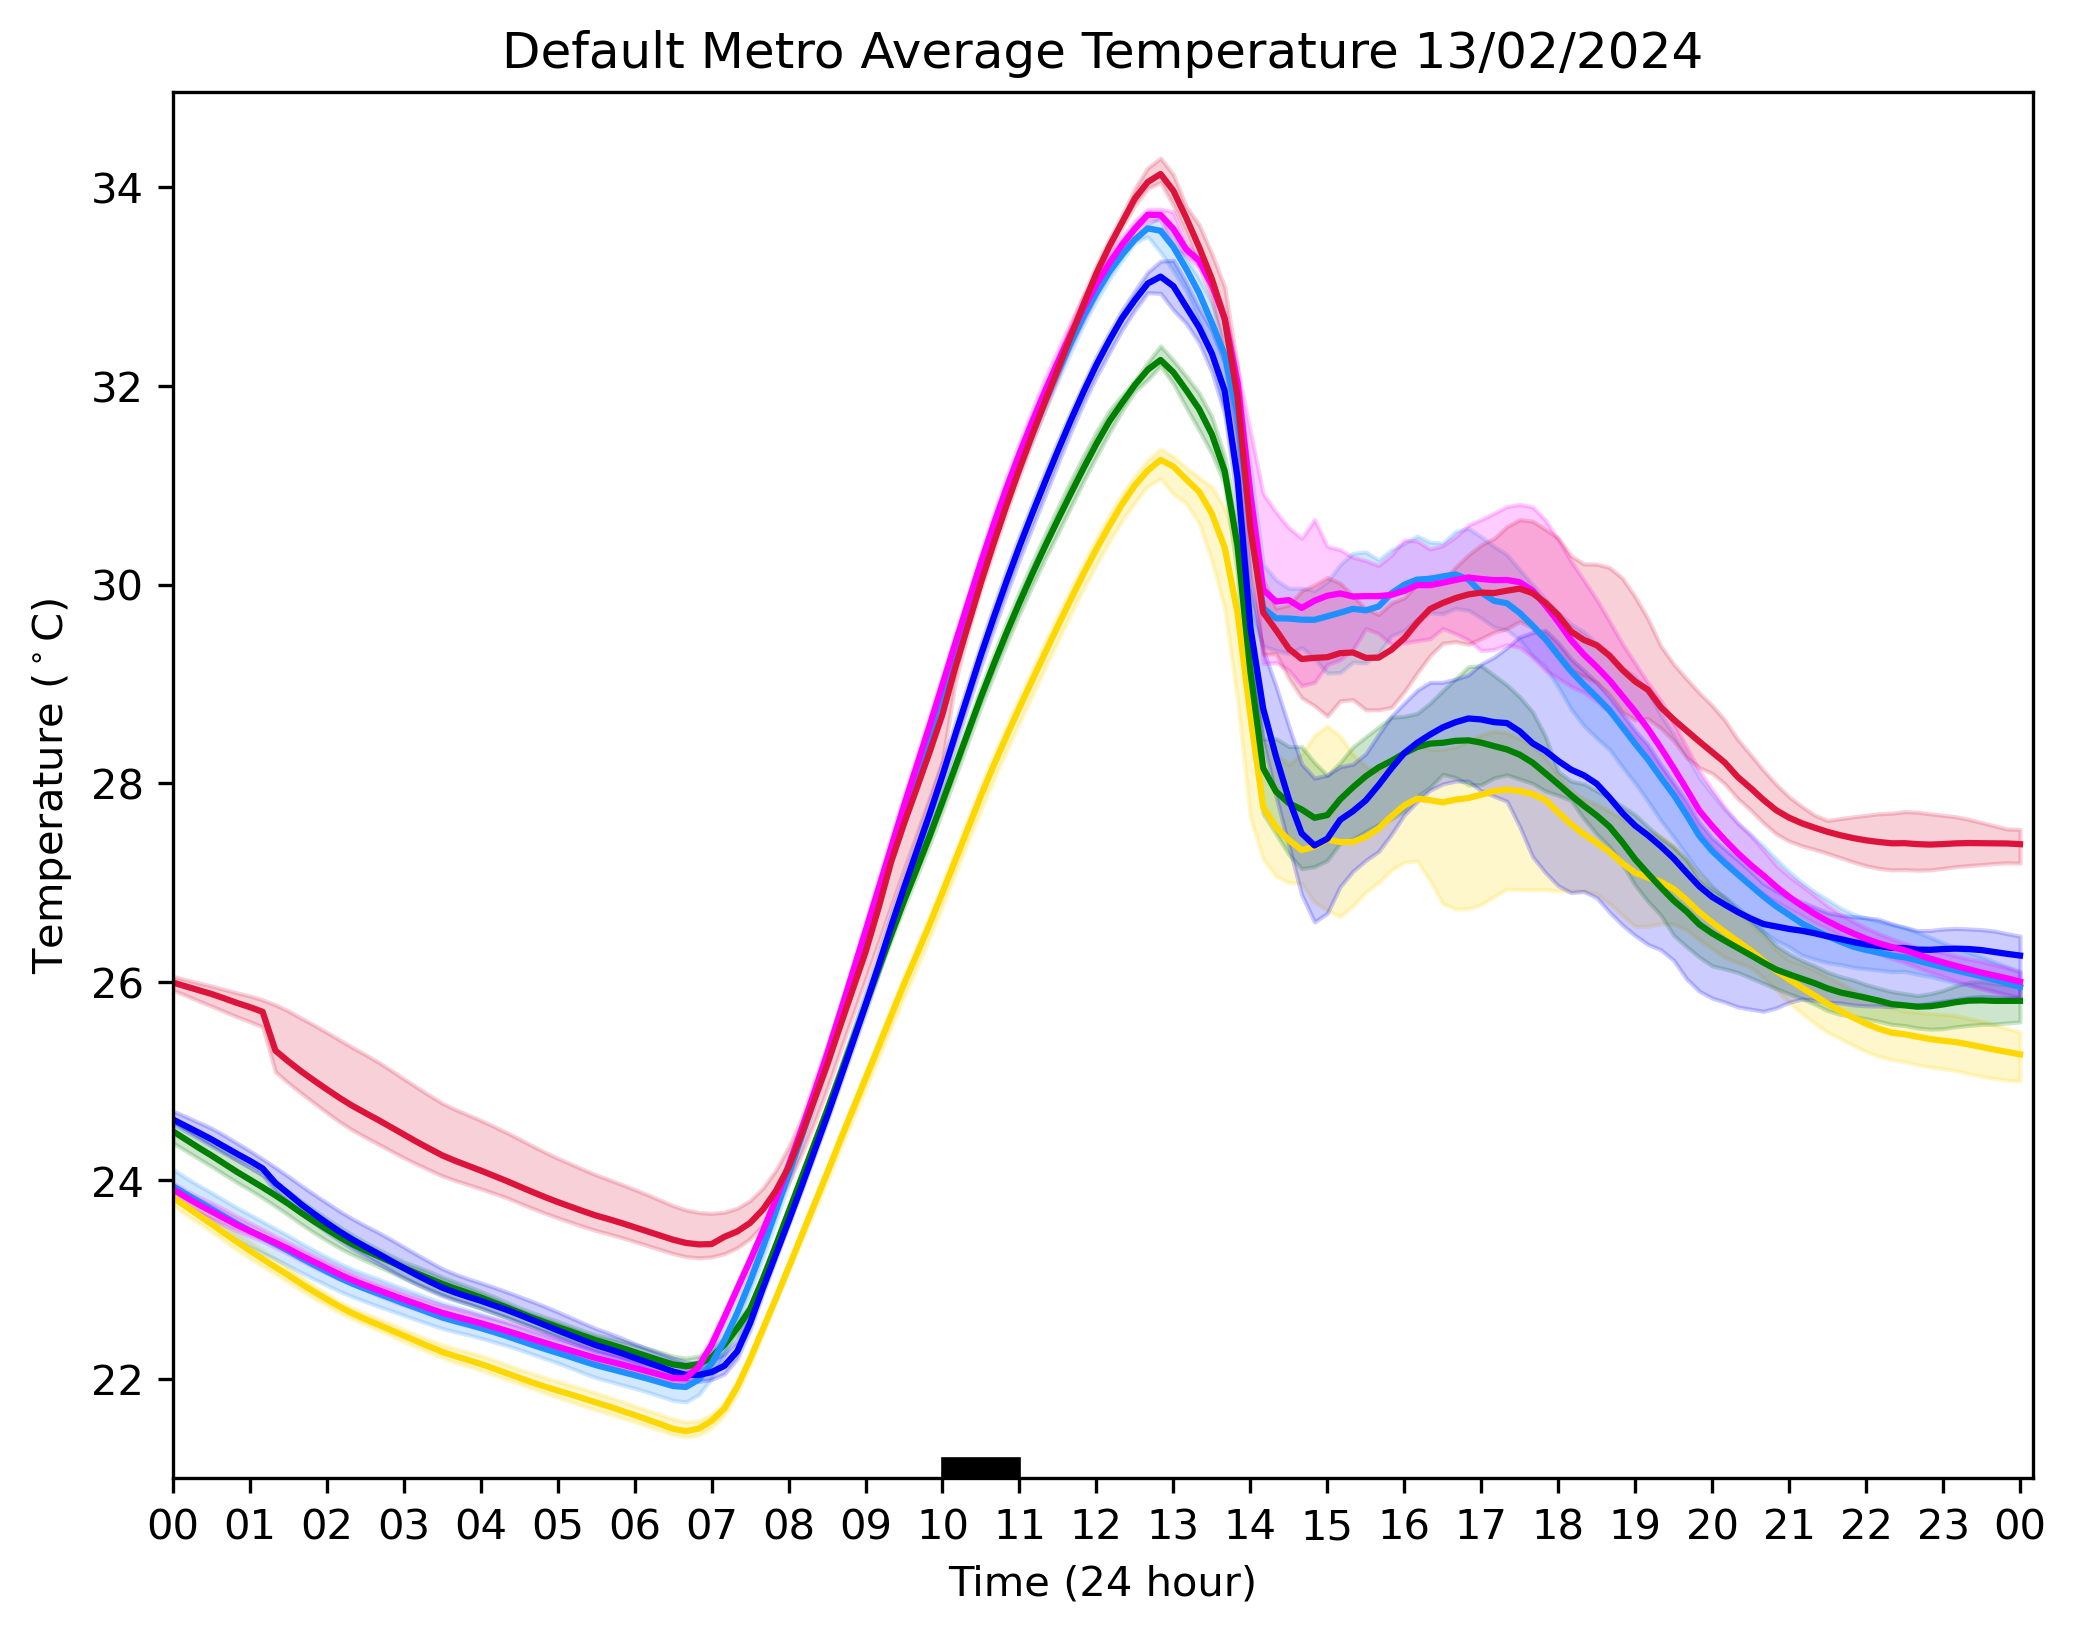

In [ ]:
# Make figure
fig = plt.figure(figsize=(8,6), dpi = 300)
ts = np.linspace(0, 144, 145)

labels = ['Cropland', 'Forest', 'Gridded No-UCM', 'Gridded BEP-BEM', 'Default No-UCM', 'Default BEP-BEM']
colours = ['gold', 'green', 'dodgerblue', 'blue', 'magenta', 'crimson']

# Plot averages and shade variability
for i in range(0,6):
    plt.plot(temp_av_values[i],label = labels[i], color = colours[i])
    # For absolute variability
    min = tmin_values[i]
    min = np.where(min <0, 0, min)
    plt.fill_between(ts, min, tmax_values[i], color=colours[i], alpha=0.2)
    # For standard deviation
    # min = temp_av_values[i]-std[i]
    # plt.fill_between(ts, min, temp_av_values[i]+std[i], color=colours[i], alpha=0.2)

# Label x-axis
plt.xlabel('Time (24 hour)')
ticks = np.arange(0, 145, 6)
labels = []
for tick in ticks:
    time = utc_to_aest(temp1[0].Time.values[tick])[1].split(' ')[0]
    labels.append(time.split(":")[0])
plt.xticks(ticks = ticks, labels = labels)
plt.ylabel('Temperature ($^\circ$C)')
plt.xlim([0,145])
plt.xlabel('Time (24 hour)')

# Mark the pre-storm hour
xs = [43.5+18,46.5+18]
ys = [21,21]
plt.plot(xs,ys,color = 'k', lw = 10)
plt.gca().set_ylim(bottom=21)

plt.legend()
plt.title(f'Default Metro Average Temperature {date_dict[storm]}')

### Ensemble-averaged wind speed

In [ ]:
# Initialising time
storm = 2017

date_dict = {2024:'13/02/2024', 2020:'17/12/2020', 2017:'18/02/2017', 2018:'20/12/2018'}

en1 = ensemble_dict[storm][0]
en2 = ensemble_dict[storm][1]
en3 = ensemble_dict[storm][2]
en4 = ensemble_dict[storm][3]
en5 = ensemble_dict[storm][4]

start_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+date_dict[storm][0:2] #local date
start_hour = '00:00:00'   #local time

end_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+str(int(date_dict[storm][0:2])+1) #local date
end_hour = '00:00:00'   #local time

print(f'Starting at {start_date} and ending at {end_date}')

inds1 = get_indexes(en1,[start_date,start_hour],[end_date,end_hour])
inds2 = get_indexes(en2,[start_date,start_hour],[end_date,end_hour])
inds3 = get_indexes(en3,[start_date,start_hour],[end_date,end_hour])
inds4 = get_indexes(en4,[start_date,start_hour],[end_date,end_hour])
inds5 = get_indexes(en5,[start_date,start_hour],[end_date,end_hour])

Starting at 2017-02-18 and ending at 2017-02-19


In [ ]:
# Extract wind data
wind1 = []
wdir1 = []
wind2 = []
wdir2 = []
wind3 = []
wdir3 = []
wind4 = []
wdir4 = []
wind5 = []
wdir5 = []

for caseind in range(len(inds1)):
    w1 = wrf.g_uvmet.get_uvmet10_wspd_wdir(en1[caseind], timeidx = ALL_TIMES, method = 'cat')[:,inds1[caseind][0]:inds1[caseind][1]+1,:,:]
    wind1.append(np.array(urb_var(w1[0,:,:,:])[0]))
    wdir1.append(np.array(urb_var(w1[:,:,:,:])[1:3]))
    w2 = wrf.g_uvmet.get_uvmet10_wspd_wdir(en2[caseind], timeidx = ALL_TIMES, method = 'cat')[:,inds2[caseind][0]:inds2[caseind][1]+1,:,:]
    wind2.append(np.array(urb_var(w2[0,:,:,:])[0]))
    wdir2.append(np.array(urb_var(w2[:,:,:,:])[1:3]))
    w3 = wrf.g_uvmet.get_uvmet10_wspd_wdir(en3[caseind], timeidx = ALL_TIMES, method = 'cat')[:,inds3[caseind][0]:inds3[caseind][1]+1,:,:]
    wind3.append(np.array(urb_var(w3[0,:,:,:])[0]))
    wdir3.append(np.array(urb_var(w3[:,:,:,:])[1:3]))
    w4 = wrf.g_uvmet.get_uvmet10_wspd_wdir(en4[caseind], timeidx = ALL_TIMES, method = 'cat')[:,inds4[caseind][0]:inds4[caseind][1]+1,:,:]
    wind4.append(np.array(urb_var(w4[0,:,:,:])[0]))
    wdir4.append(np.array(urb_var(w4[:,:,:,:])[1:3]))
    w5 = wrf.g_uvmet.get_uvmet10_wspd_wdir(en5[caseind], timeidx = ALL_TIMES, method = 'cat')[:,inds5[caseind][0]:inds5[caseind][1]+1,:,:]
    wind5.append(np.array(urb_var(w5[0,:,:,:])[0]))
    wdir5.append(np.array(urb_var(w5[:,:,:,:])[1:3]))

In [ ]:
wmin_values = []
wmax_values = []

# Find standard deviations in wind
st_array = np.stack((wind1, wind2, wind3, wind4, wind5)) # ensemble, runs, times
std = np.std(st_array, axis=0, dtype=np.float64)

# Find minimum and maximums among ensemble members for each time step
for i in range(len(wind1)):
    wmin_values.append(np.minimum.reduce([wind1[i], wind2[i], wind3[i], wind4[i], wind5[i]]))
    wmax_values.append(np.maximum.reduce([wind1[i], wind2[i], wind3[i], wind4[i], wind5[i]]))

# Find ensemble-average wind speed
wind_av_values = []

for i in range(len(wind1)):
    a = (wind1[i]+wind2[i]+wind3[i]+wind4[i]+wind5[i])/5
    wind_av_values.append(a)

Text(0.5, 1.0, 'Average Windspeed 18/02/2017')

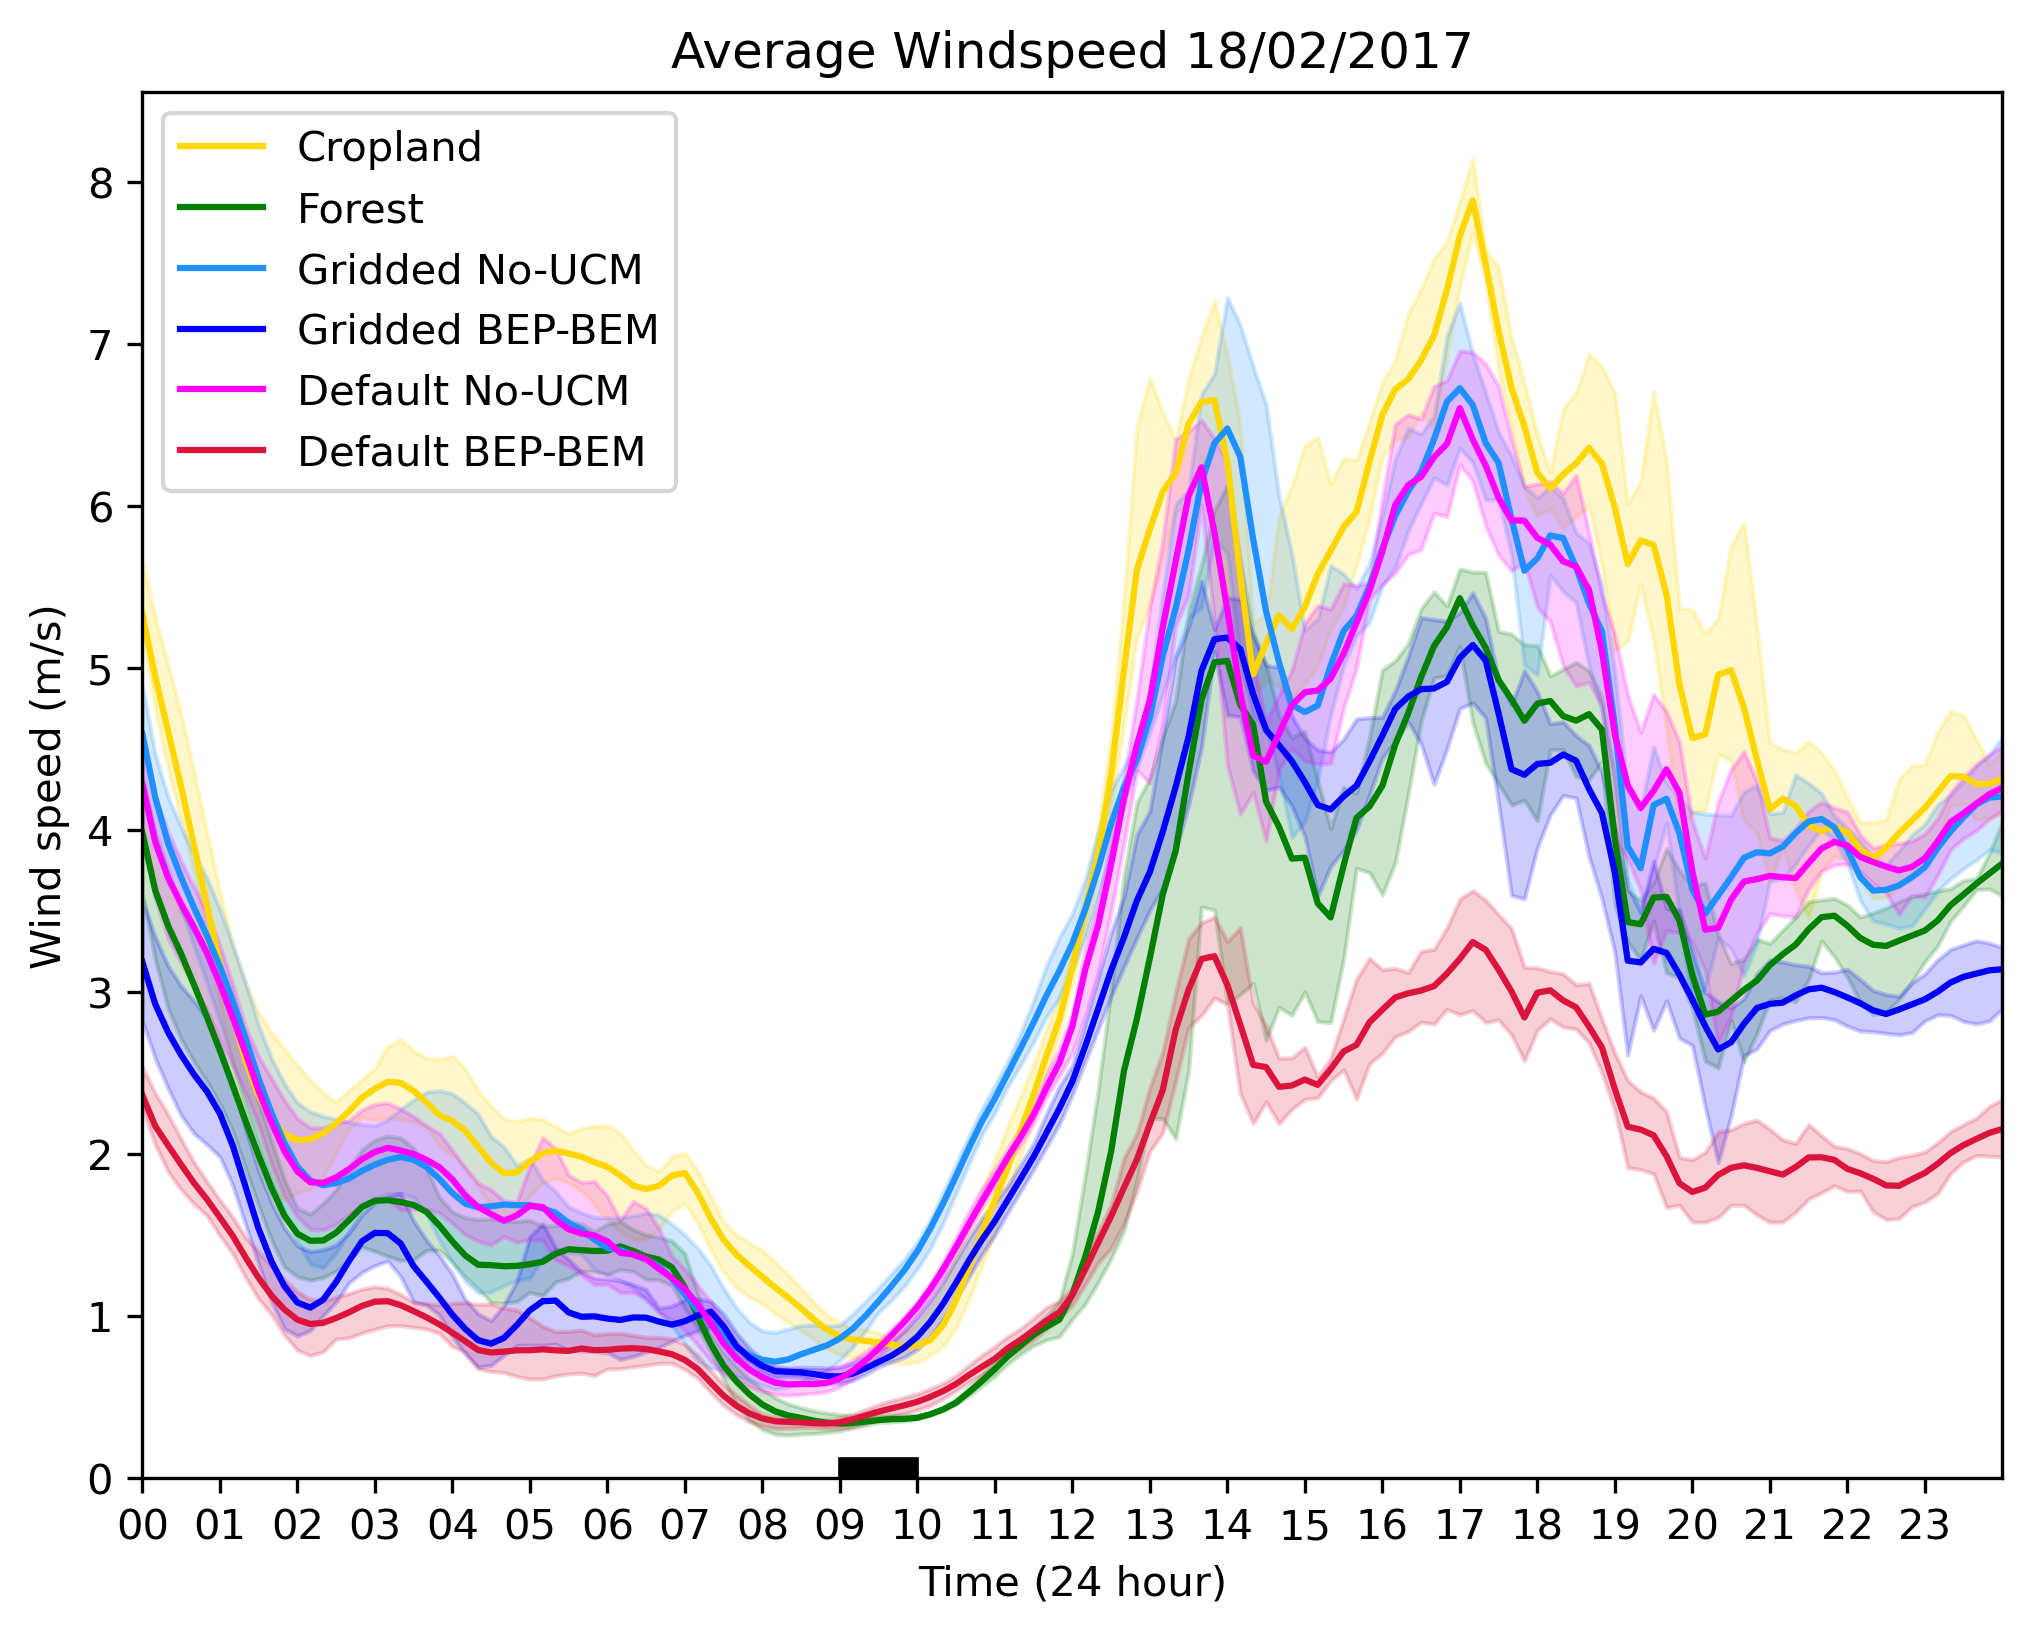

In [ ]:
# Make plots
fig = plt.figure(figsize=(8,6), dpi = 300)
ts = np.arange(46, 145, 100)
ts = np.linspace(0, 144, 145)

labels = ['Cropland', 'Forest', 'Gridded No-UCM', 'Gridded BEP-BEM', 'Default No-UCM', 'Default BEP-BEM']
colours = ['gold', 'green', 'dodgerblue', 'blue', 'magenta', 'crimson']
for i in range(0,6):
    plt.plot(wind_av_values[i],label = labels[i], color = colours[i])
    # For absolute variation
    min = wmin_values[i]
    min = np.where(min <0, 0, min)
    plt.fill_between(ts, min, wmax_values[i], color=colours[i], alpha=0.2)
    # For standard dev
    # min = wind_av_values[i]-std[i]
    # plt.fill_between(ts, min, wind_av_values[i]+std[i], color=colours[i], alpha=0.2)

plt.xlabel('Time (24 hour)')
ticks = np.arange(0, 144, 6)
labels = []
for tick in ticks:
    time = utc_to_aest(w2.Time.values[tick])[1].split(' ')[0]
    labels.append(time.split(":")[0])
plt.xlim([0, 144])

# Mark pre-storm hour
xs = [43.5+12,46.5+12]
ys = [0,0]
plt.plot(xs,ys,color = 'k', lw = 10)
plt.gca().set_ylim(bottom=0)

plt.xlabel('Time (24 hour)')
plt.xlim(36,144)
plt.xticks(ticks = ticks, labels = labels)
plt.ylabel('Wind speed (m/s)')
plt.legend()
plt.title(f'Average Windspeed {date_dict[storm]}')

### Wind direction time series (using previously extracted wind data)

In [ ]:
# Find median wind speed across the Sydney metropolitan area
wdirs = [np.array(wdir1), np.array(wdir2), np.array(wdir3), np.array(wdir4), np.array(wdir5)]
winddirs = []
median_dirs = []

for windarray in wdirs:
    array_reshaped = windarray.reshape(windarray.shape[:-2] + (-1,))
    array_clean = array_reshaped[~np.isnan(array_reshaped)]
    winddir_clean = array_clean.reshape(windarray.shape[0], windarray.shape[1], windarray.shape[2], -1)
    winddir_median = np.median(winddir_clean, axis=-1)
    winddirs.append(winddir_clean)
    median_dirs.append(winddir_median)

In [ ]:
labels = ['Cropland', 'Pre-European', 'Forest', 'Gridded No-UCM', 'Gridded BEP-BEM', 'Default No-UCM', 'Default BEP-BEM']
colours = ['gold', 'yellowgreen', 'green', 'dodgerblue', 'blue', 'magenta', 'crimson']

# Make figure
x = np.linspace(0,144,145)
plt.figure(figsize=(10, 6), dpi = 300)
cs = [0,2,3,4,5,6]

# Plot the median wind speed for each ensemble member of the 6 analysed setups
for c in cs:
    for i, median_array in enumerate(median_dirs):
        if i == 0:
            plt.scatter(x, median_array[c, 1, :], label=f'{labels[c]}', color = colours[c], s=3)
        plt.scatter(x, median_array[c, 1, :], color = colours[c], s=3)

# Mark pre-storm hour
xs = [43.1+12,46.9+12]
ys = [0,0]
plt.xlabel('Time (24 hour)')
plt.xlim(36,144)
plt.plot(xs,ys,color = 'k', lw = 10)
plt.legend(markerscale=3)

# Relabel y-axis using wind direction
plt.yticks(np.arange(0, 361, 45), labels=["N", "NE", "E", "SE", "S", "SW", "W", "NW", "N"])
ticks = np.arange(0, 144, 6)
labels = []
for tick in ticks:
    time = utc_to_aest(w2.Time.values[tick])[1].split(' ')[0]
    labels.append(time.split(":")[0])
plt.ylim([0, 360])
plt.xlim([0,144])
plt.xticks(ticks = ticks, labels = labels)
plt.xlabel('Time (24 hour)')
plt.ylabel('Wind direction')
plt.title(f'Median Wind Direction {storm}')

### Hail time series

In [ ]:
# Initialising time
storm = 2018

date_dict = {2024:'13/02/2024', 2020:'17/12/2020', 2017:'18/02/2017', 2018:'20/12/2018'}

en1 = ensemble_dict[storm][0]
en2 = ensemble_dict[storm][1]
en3 = ensemble_dict[storm][2]
en4 = ensemble_dict[storm][3]
en5 = ensemble_dict[storm][4]

start_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+date_dict[storm][0:2] #local date
start_hour = '00:00:00'   #local time

end_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+str(int(date_dict[storm][0:2])+1) #local date
end_hour = '00:00:00'   #local time

print(f'Starting at {start_date} and ending at {end_date}')

inds1 = get_indexes(en1,[start_date,start_hour],[end_date,end_hour])
inds2 = get_indexes(en2,[start_date,start_hour],[end_date,end_hour])
inds3 = get_indexes(en3,[start_date,start_hour],[end_date,end_hour])
inds4 = get_indexes(en4,[start_date,start_hour],[end_date,end_hour])
inds5 = get_indexes(en5,[start_date,start_hour],[end_date,end_hour])

Starting at 2018-12-20 and ending at 2018-12-21


In [ ]:
# Extracting surface hail data
hail1 = []
hail2 = []
hail3 = []
hail4 = []
hail5 = []

for caseind in range(len(inds1)):
    h1 = wrf.getvar(en1[caseind], 'HAIL_MAXK1', timeidx=ALL_TIMES, method='cat')[inds1[caseind][0]:inds1[caseind][1]+1,:,:]*100
    hail1.append(h1)
    h2 = wrf.getvar(en2[caseind], 'HAIL_MAXK1', timeidx=ALL_TIMES, method='cat')[inds2[caseind][0]:inds2[caseind][1]+1,:,:]*100
    hail2.append(h2)
    h3 = wrf.getvar(en3[caseind], 'HAIL_MAXK1', timeidx=ALL_TIMES, method='cat')[inds3[caseind][0]:inds3[caseind][1]+1,:,:]*100
    hail3.append(h3)
    h4 = wrf.getvar(en4[caseind], 'HAIL_MAXK1', timeidx=ALL_TIMES, method='cat')[inds4[caseind][0]:inds4[caseind][1]+1,:,:]*100
    hail4.append(h4)
    h5 = wrf.getvar(en5[caseind], 'HAIL_MAXK1', timeidx=ALL_TIMES, method='cat')[inds5[caseind][0]:inds5[caseind][1]+1,:,:]*100
    hail5.append(h5)

In [ ]:
# For fixing duplicates in 2018 storm
# hail1[5] = hail1[5][88:].drop_duplicates(dim='Time', keep='first')

In [ ]:
# Find number of grid cells with hail
gn1 = []
gn2 = []
gn3 = []
gn4 = []
gn5 = []
urban_index = 1 # total domain = 0 metropolitan  = 1
for caseind in range(len(inds1)):
    gn1.append(grid_number(hail1[caseind])[urban_index]) 
    gn2.append(grid_number(hail2[caseind])[urban_index])
    gn3.append(grid_number(hail3[caseind])[urban_index])
    gn4.append(grid_number(hail4[caseind])[urban_index])
    gn5.append(grid_number(hail5[caseind])[urban_index])

# Find the minimum and maximum amongst ensemble members for each setup
min_values = []
max_values = []
stack = np.stack((gn1, gn2, gn3, gn4, gn5)) # ensemble, runs, times

# Find standard deviations
std = np.std(stack, axis=0, dtype=np.float64)
for i in range(len(hail1)):
    min_values.append(np.minimum.reduce([gn1[i], gn2[i], gn3[i], gn4[i], gn5[i]]))
    max_values.append(np.maximum.reduce([gn1[i], gn2[i], gn3[i], gn4[i], gn5[i]]))

# Find average hail coverage
av_values = []
for i in range(len(gn1)):
    a = (gn1[i]+gn2[i]+gn3[i]+gn4[i]+gn5[i])/5
    av_values.append(a)

Text(0.5, 1.0, 'Total urban hail coverage for 20/12/2018')

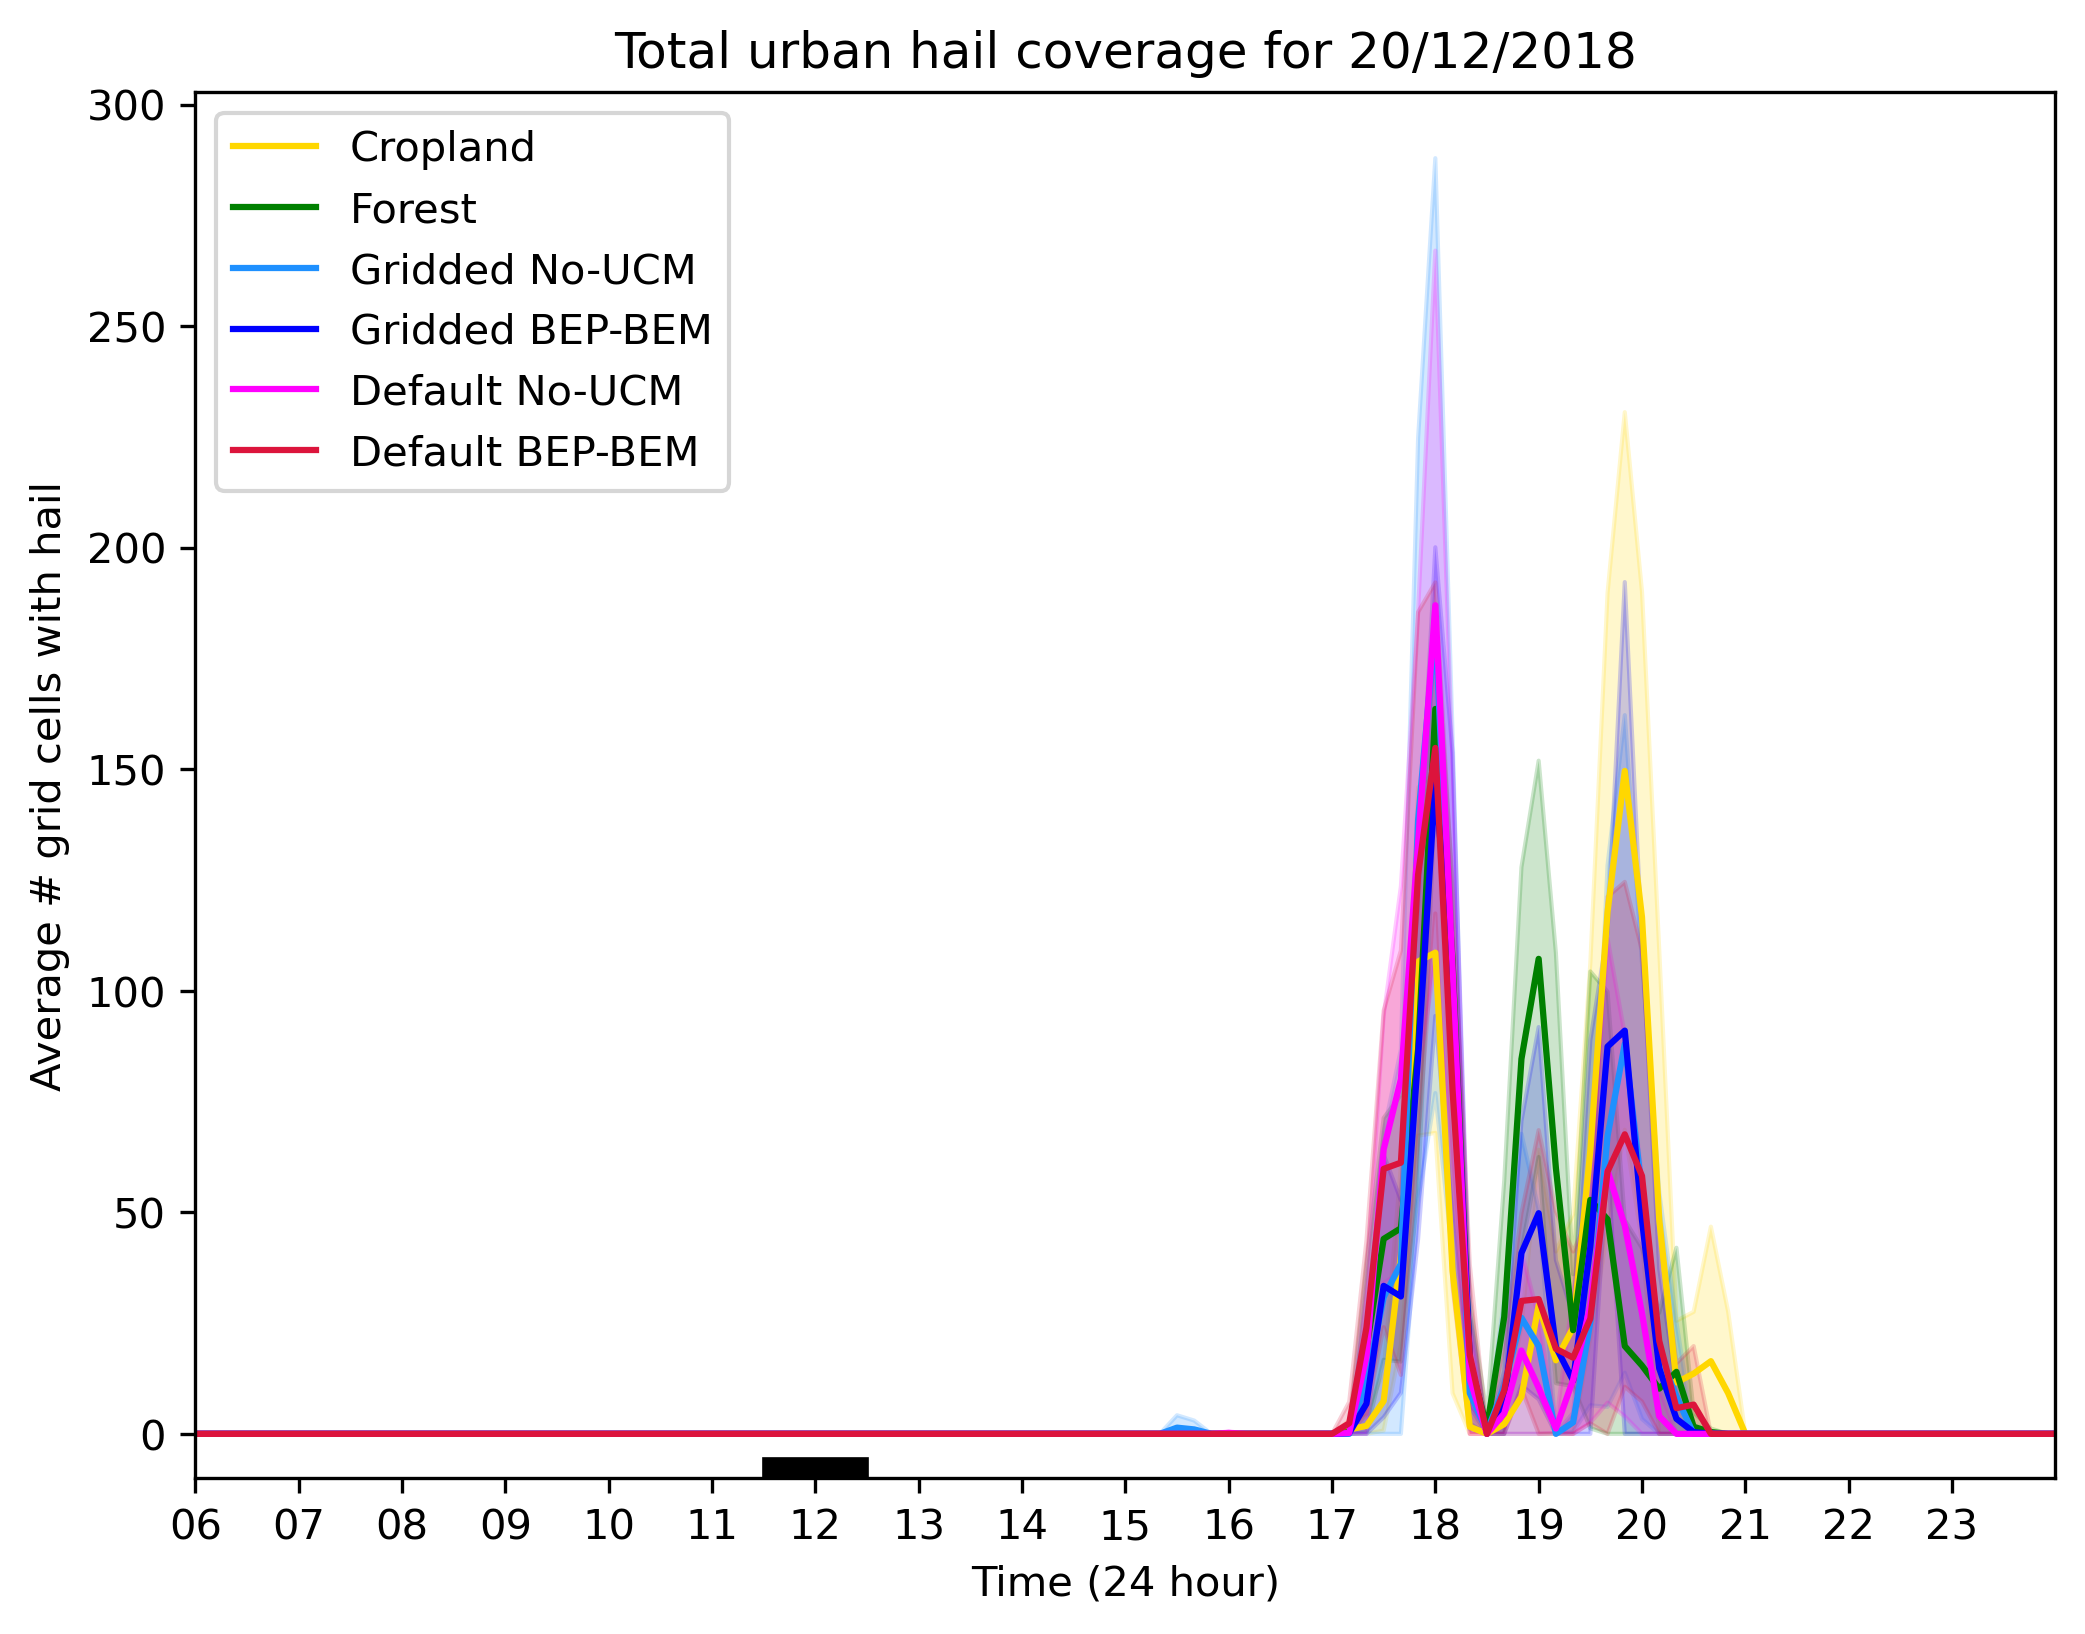

In [ ]:
# Make figure
fig = plt.figure(figsize=(8,6), dpi = 300)
ts = np.linspace(0, 144, 145)

# Name the plot
if urban_index == 1:
    urban = ' urban'
else:
    urban = ''

labels = ['Cropland', 'Forest', 'Gridded No-UCM', 'Gridded BEP-BEM', 'Default No-UCM', 'Default BEP-BEM']
colours = ['gold', 'green', 'dodgerblue', 'blue', 'magenta', 'crimson']
for i in range(0,6):
    plt.plot(av_values[i],label = labels[i], color = colours[i])
    # For standard deviation
    min = av_values[i]-std[i] 
    min = np.where(min <0, 0, min)
    plt.fill_between(ts, min, av_values[i]+std[i], color=colours[i], alpha=0.2)
    # For absolute variability
    # min = min_values[i]
    # plt.fill_between(ts, min, max_values[i], color=colours[i], alpha=0.2)

# Marking pre-storm hour
xs = [43.1+27,46.9+27]
hailob = [43.1+42,-100]
bot = -10
ys = [bot,bot]
plt.plot(xs,ys,color = 'k', lw = 10)

# Marking observation hail time
plt.plot(84-3,bot,color = 'k', marker = '^',ms = 15)
plt.gca().set_ylim(bottom=bot)

plt.xlabel('Time (24 hour)')
plt.xlim(36,144)
ticks = np.arange(36, 144, 6)
labels = []
for tick in ticks:
    time = utc_to_aest(h3.Time.values[tick])[1].split(' ')[0]
    utc = h2.Time.values[tick]
    labels.append(time.split(":")[0])
plt.xticks(ticks = ticks, labels = labels)
plt.ylabel('Average # grid cells with hail')
plt.legend()
plt.title(f'Total{urban} hail coverage for 20/12/2018')